# Raport z zadania sztuczne sieci neuronowe

In [5]:
from preprocessing import MnistDataloader
from experiment import experiment, plot_costs
from model import Model
from layer import Layer
# import pandas as pd
import numpy as np

## Decyzje projektowe
- Początkowe parametry inicjalizowane są za pomocą metody He initialization. Została wybrana, ponieważ unika zbyt dużego zniejszania/przyrostu wielkości wejściowych wag przy wykorzystaniu funkcji aktywacji ReLU.
- Funkcjami aktywacji kolejnych warstw ukrytych jest funkcja ReLU. Funkcją aktywacji ostatniej warstwy jest Softmax.
- Funkcja kosztu to cross-entropy loss.
- Dane treningowe dzielone są na batche o zadanym rozmiarze. W trakcie treningu obrazy do batchy dobierane są losowo.
## Wstępne przetwarzanie danych
- Zbiór danych został podzielony na 10000 obrazów w zbiorze treningowym, 1000 w zbiorze walidacyjnym i 2000 w zbiorze testowym. 
- Zbiór danych składa się z obrazów o wymiarach 14x14.
- Po załadowaniu obrazy są spłaszczane i skalowane by mieć wartości pomiędzy 0 a 1.
- Labele w zbiorach Y zamieniane są na wektory one-hot.

In [6]:
mnist_dataloader = MnistDataloader("train-images-idx3-ubyte", "train-labels-idx1-ubyte", "t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

# Trenowanie oraz walidacja

In [8]:
model = Model()
model.add_module(Layer((196, 100), "relu"))
model.add_module(Layer((100, 50), "relu"))
model.add_module(Layer((50, 20), "relu"))
model.add_module(Layer((20, 10), "softmax"))


In [9]:
model.train(x_train, y_train, 100, 3e-4)

ValueError: shapes (100,196) and (60000,28,28) not aligned: 196 (dim 1) != 28 (dim 1)

In [3]:
# LAYERS_DIMS = [[196, 100, 20, 5, 10], [196, 5, 10], [196, 50, 20, 10], [196, 20, 10], [196, 50, 10]]
# LEARNING_RATES = [0.002, 0.001, 0.0005, 0.006, 0.001]
# BATCHES = [1024, 64, 512, 128, 256]
# EPOCHS = [2000, 2000, 2000, 2000, 2000]
# results, costs, best_model = experiment(LAYERS_DIMS, LEARNING_RATES, (X_train, Y_train, X_dev, Y_dev), BATCHES, EPOCHS)
# df = pd.DataFrame(results)
# df

/home/atarsander/WSI/Szymczyk-Aleksander-WSI23Z/Zad5/model.py:32: RuntimeWarning: invalid value encountered in divide
  A = e_x / e_x.sum(axis=0, keepdims=True)
/home/atarsander/WSI/Szymczyk-Aleksander-WSI23Z/Zad5/model.py:86: RuntimeWarning: invalid value encountered in divide
  A = e_x / e_x.sum(axis=0)


,Number of epochs,Batch size,Learning rate,Layers,Train accuracy,Dev accuracy
0,2000,1024,0.0020,"[196, 100, 20, 5, 10]",0.83802,0.8304
1,2000,64,0.0010,"[196, 5, 10]",0.81966,0.8167
2,2000,512,0.0005,"[196, 50, 20, 10]",0.85120,0.8522
3,2000,128,0.0060,"[196, 20, 10]",0.93400,0.9292
4,2000,256,0.0010,"[196, 50, 10]",0.09994,0.0926


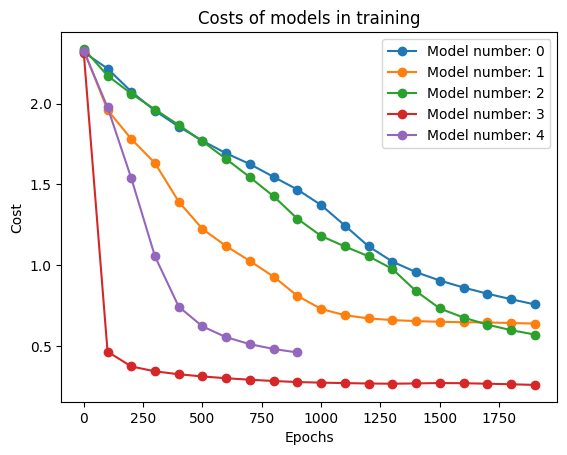

In [4]:
plot_costs(costs)

In [5]:
accuracy_test = best_model.predict(X_test, Y_test)
print(f"Accuracy: {accuracy_test}")

Accuracy: 0.9327


# Wyniki
- Najlepszą dokładność na zbiorze walidacyjnym osiągnął model trzeci, z jedną ukrytą warstwą o rozmiarze 20, learning ratem o wartości 0.006 oraz batch sizem równym 128.
- W modelu numer cztery w trakcie treningu doszło do przepełnienia.
- Pozostałe modele osiągnęły dokładność na zbiorze walidacyjnym w granicach 80-85%.
- Model trzeci na zbiorze testowym osiągnął wynik 93%.
# Wnioski
- Modele z wiekszą ilością ukrytych warstw oraz ukrytych neuronów nie zawsze osiągały wyższą dokładność. Architektura modelu powinna być ściśle dopasowana do poziomu złożoności danych - nie może być za prosta (jak w modelu 1) ani zbyt rozbudowana (jak w modelu 0).
- Częste aktualizowanie parametrów w przypadku małego batch sizu może mieć negatywny wpływ na dokładność.
- Mniejszy learning rate w modelu o bardziej rozbudowanej architekturze zapobiegał "eksplozji" gradientu.
- Dokładność treningowa nie odbiegała zbytnio od dokładności walidacyjnej (największa różnica w modelu trzecim). Nie doszło do zjawiska zbytniego overfittingu.